Cancer cell classification using Scikit-learn
Machine Learning is a sub-field of Artificial Intelligence that gives systems the ability to learn themselves without being explicitly programmed to do so. Machine Learning can be used in solving many real world problems. 
Let’s classify cancer cells based on their features, and identifying them if they are ‘malignant’ or ‘benign’. We will be using scikit-learn for a machine learning problem. Scikit-learn is an open-source machine learning, data mining and data analysis library for Python programming language.
 
Scikit-learn comes with a few small standard datasets that do not require downloading any file from any external website. The dataset that we will be using for our machine learning problem is the Breast cancer wisconsin (diagnostic) dataset. The dataset includes several data about the breast cancer tumors along with the classifications labels, viz., malignant or benign. It can be loaded using the following function: 

# importing the Python module
import sklearn
 
# importing the dataset
from sklearn.datasets import load_breast_cancer
# loading the dataset
data = load_breast_cancer()

In [2]:
# importing necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

In [3]:
#Loading the dataset and conerting it into a dataframe
Cancer_data=load_breast_cancer()
Cancer_dataframe=pd.DataFrame(data=Cancer_data.data,columns=Cancer_data.feature_names)
Cancer_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Adding the target variable in the dataset
Cancer_dataframe['diagnosis']=Cancer_data.target

In [5]:
Cancer_dataframe['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int32

In [6]:
Cancer_dataframe.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [7]:
Cancer_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
Cancer_dataframe.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [9]:
Cancer_dataframe['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int32

In [10]:
Cancer_dataframe['diagnosis'].value_counts()  # getting count of patients suffering from both the diseases

diagnosis
1    357
0    212
Name: count, dtype: int64

In [11]:
correlations=Cancer_dataframe.corr()['diagnosis']  #finding the correlation between the dataframe
print(correlations)

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

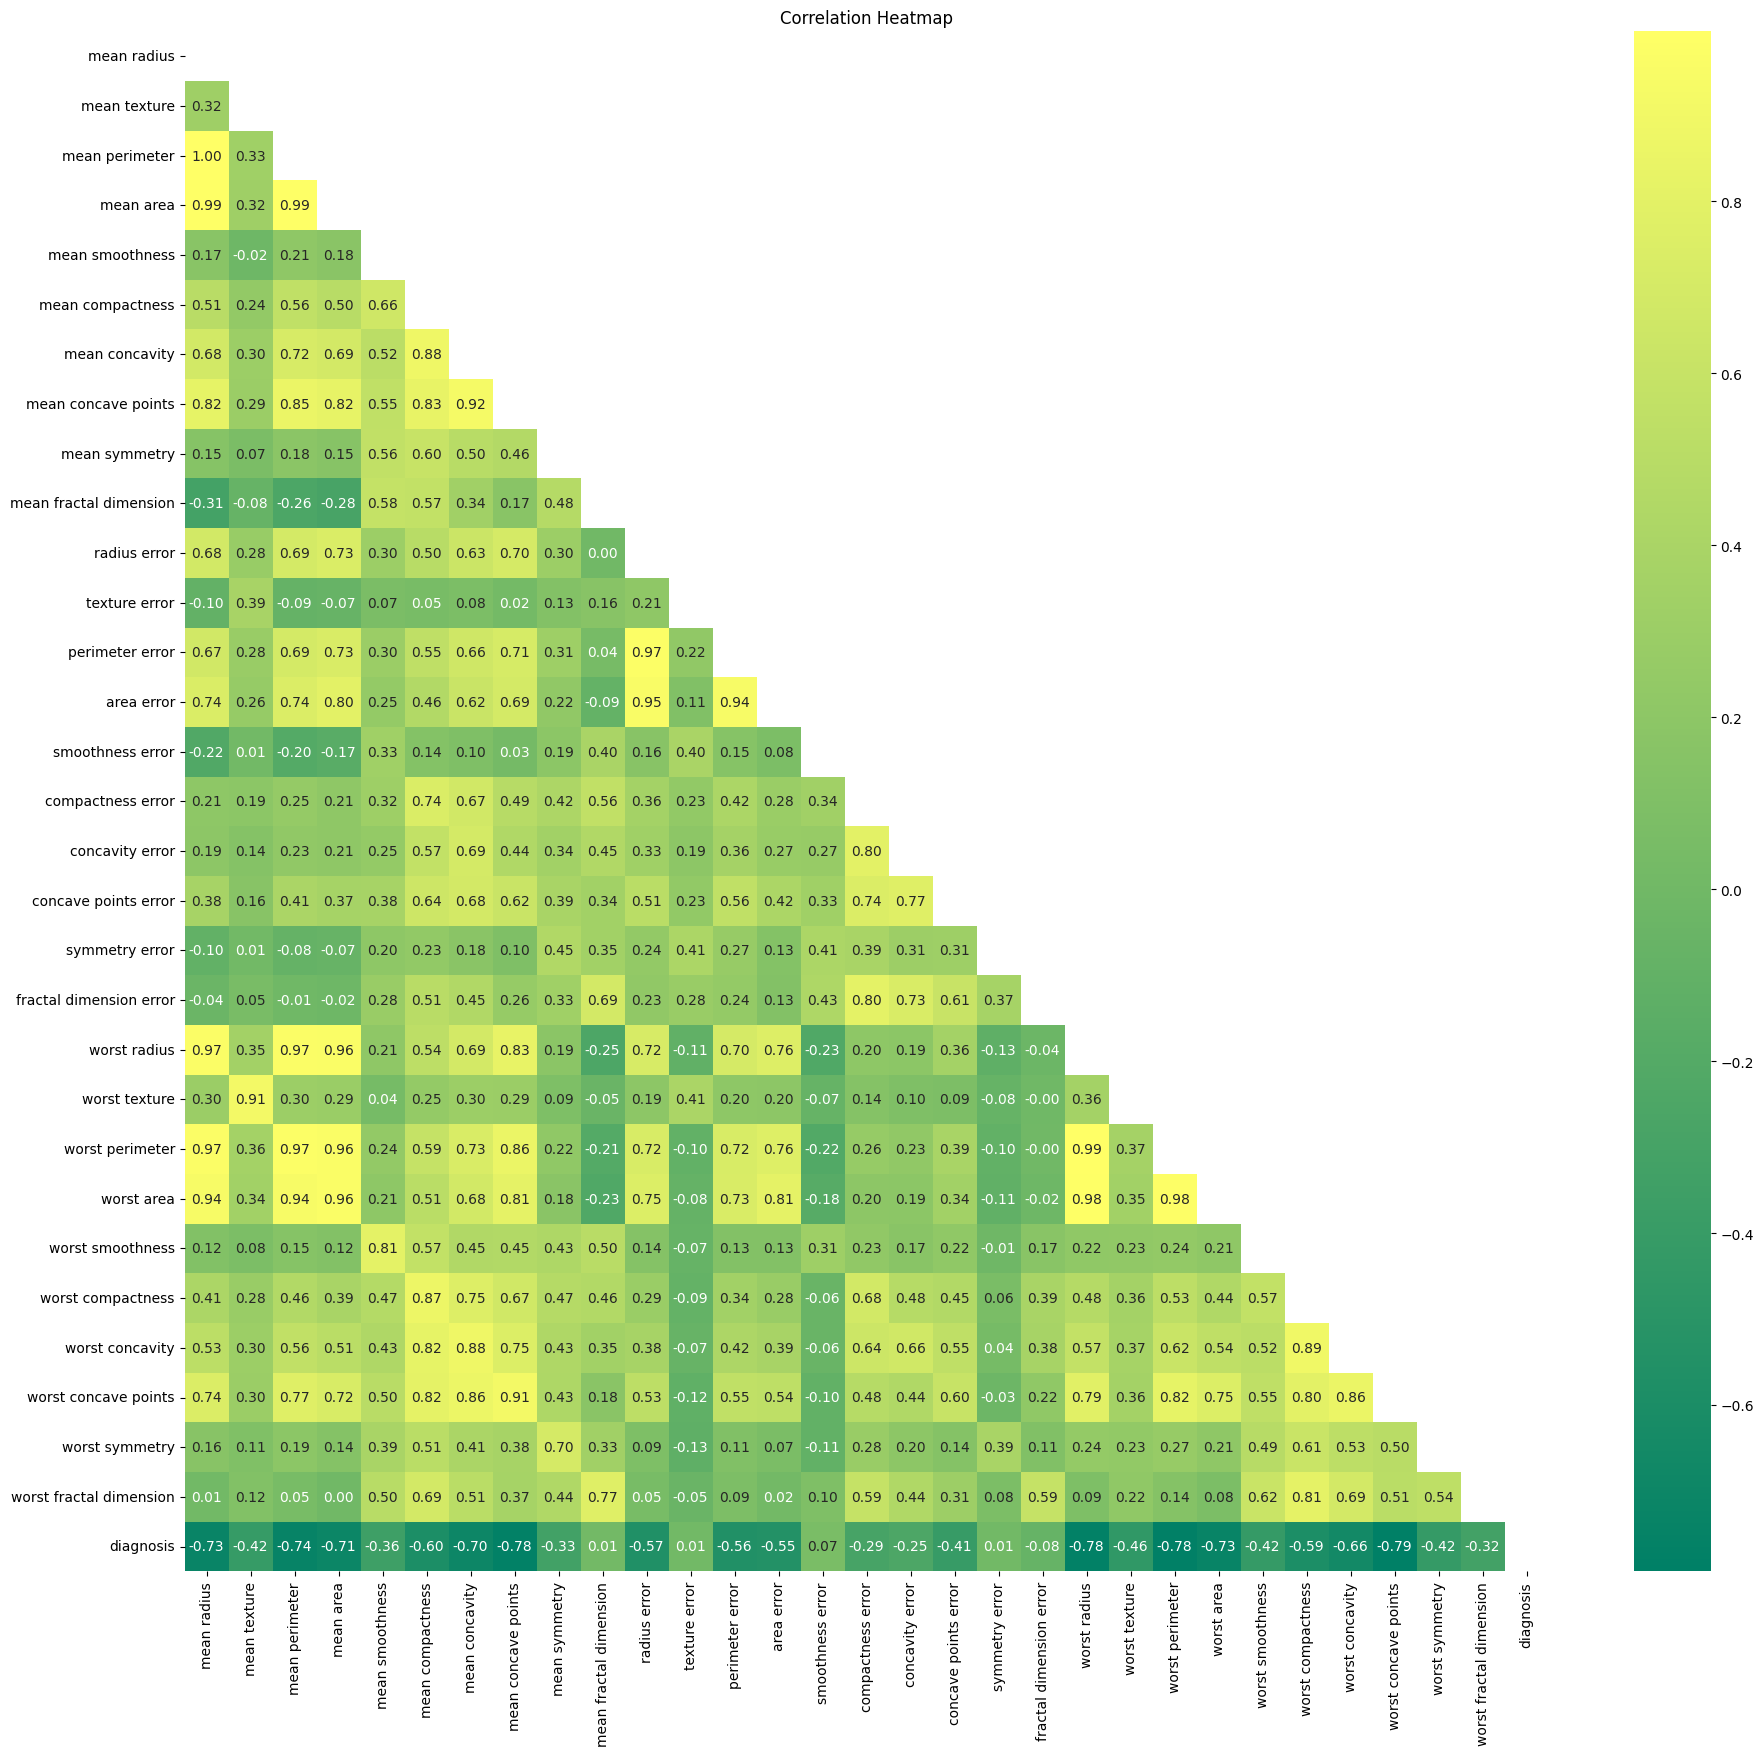

In [12]:
#printing the half heatmap showing the correlation of the columns between the dataframe
plt.figure(figsize=(22,20))

corr_matrix = Cancer_dataframe.corr()  #finding correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  #it helps you in printing half heatmap
sns.heatmap(corr_matrix, annot=True, cmap="summer", fmt=".2f", mask=mask)
plt.title("Correlation Heatmap")
plt.show()

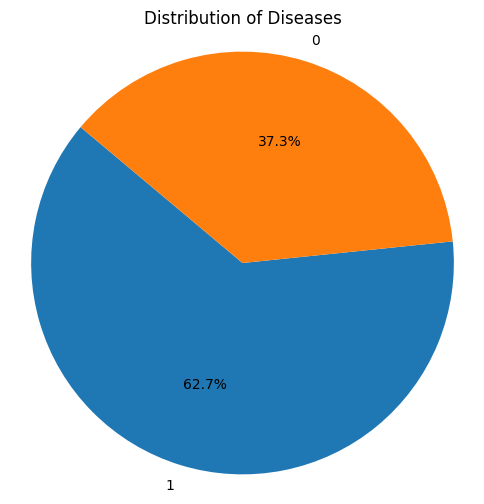

In [13]:
#Plotting pie graph to look for the percentage of disease
disease_counts = Cancer_dataframe["diagnosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize=(6, 6)) 
plt.pie(temp_df["Counts"], labels=temp_df["Disease"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Diseases')  
plt.show()

Text(0.5, 1.0, 'Distribution of Diagnosis')

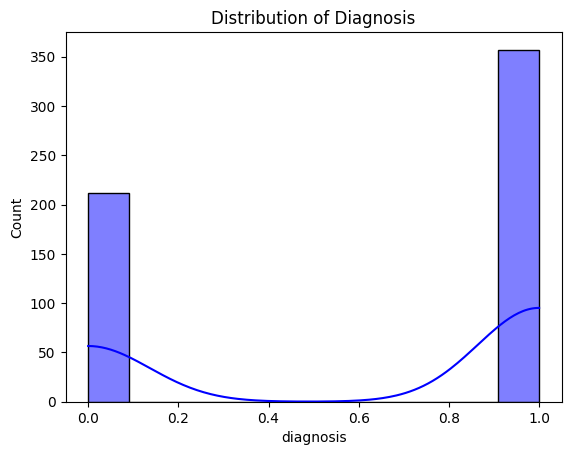

In [14]:
#plotting histplot graph for diagnosis
sns.histplot(data=Cancer_dataframe, x='diagnosis',color='blue', kde=True)
plt.title("Distribution of Diagnosis")

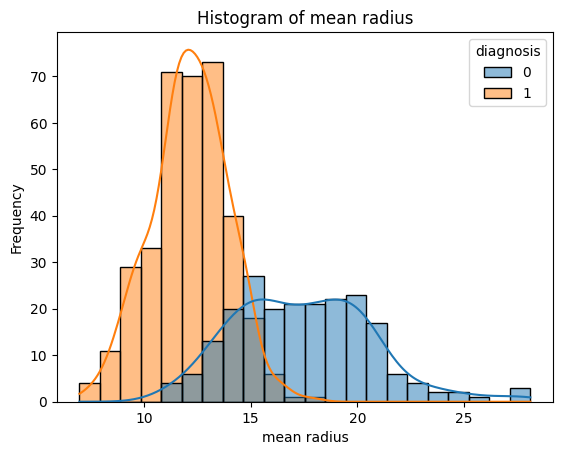

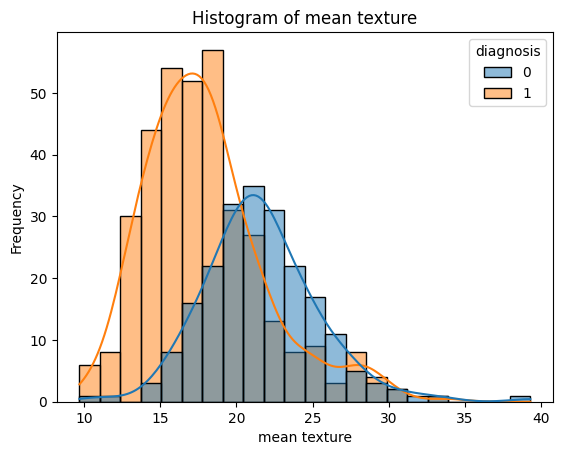

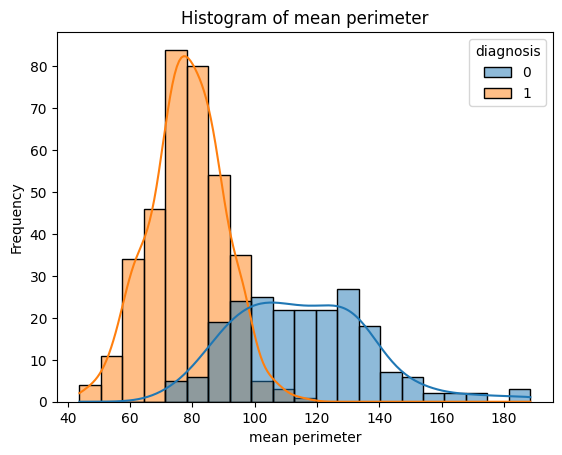

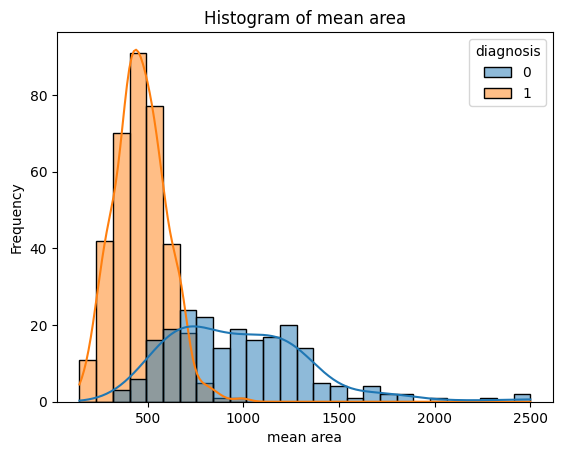

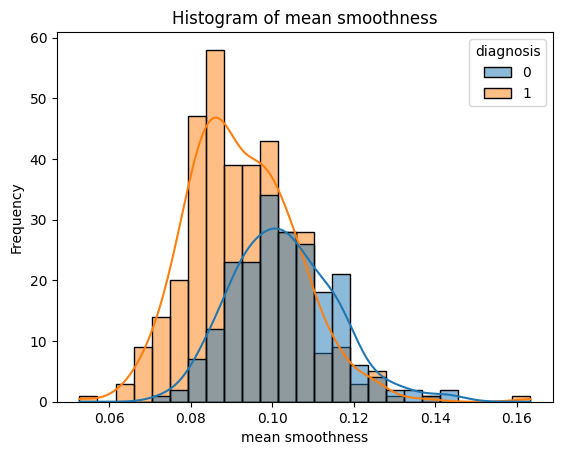

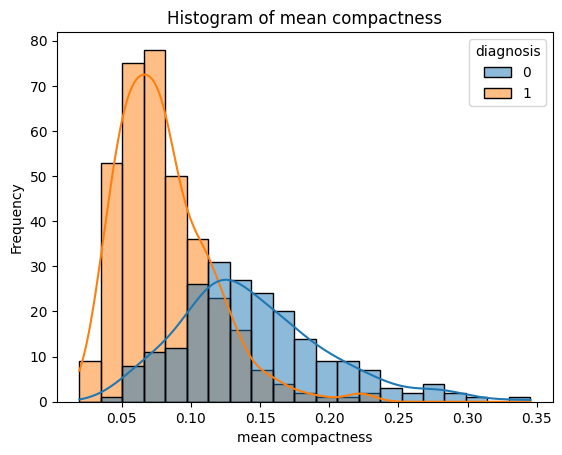

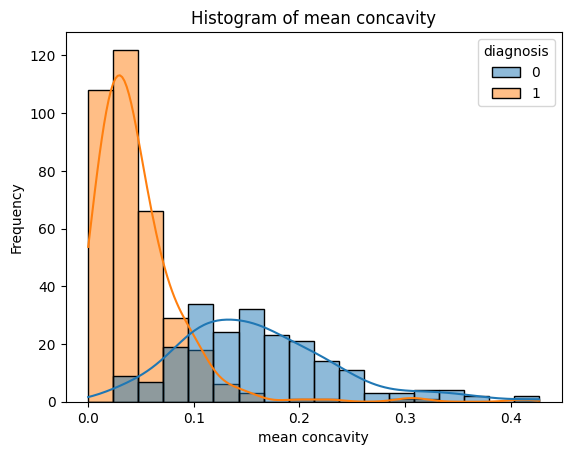

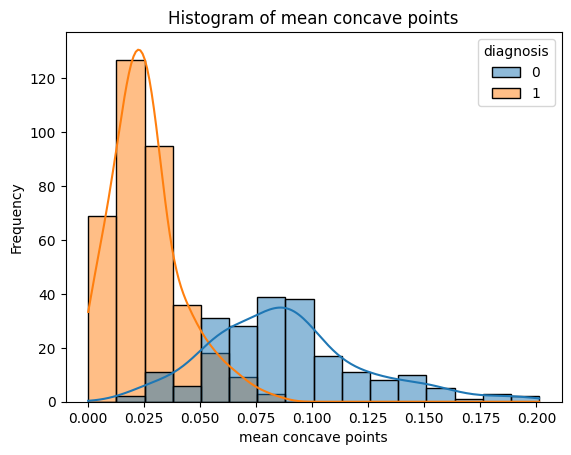

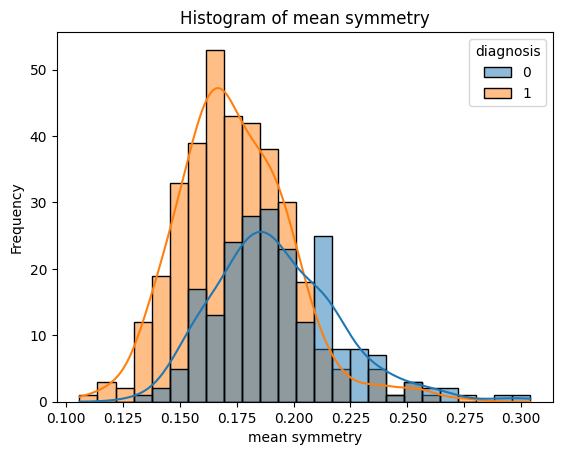

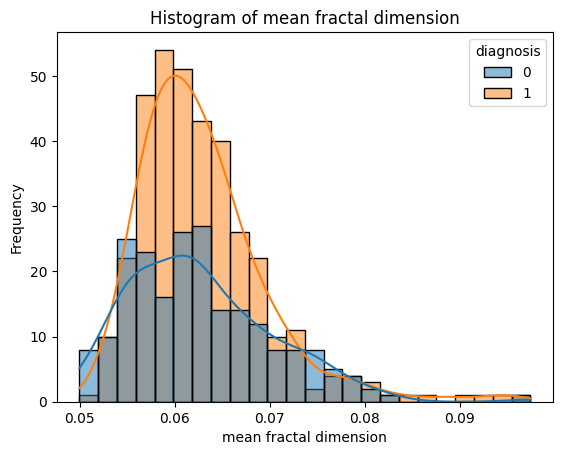

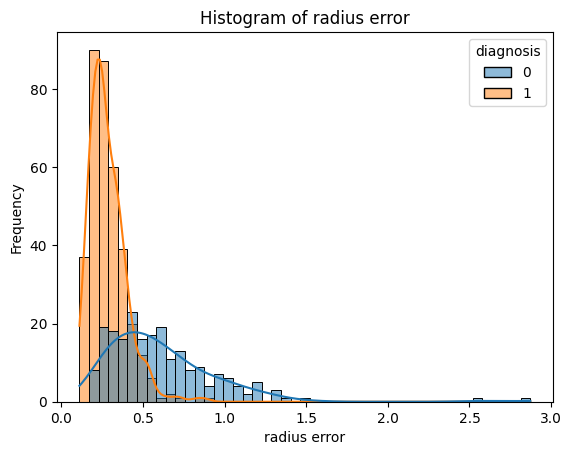

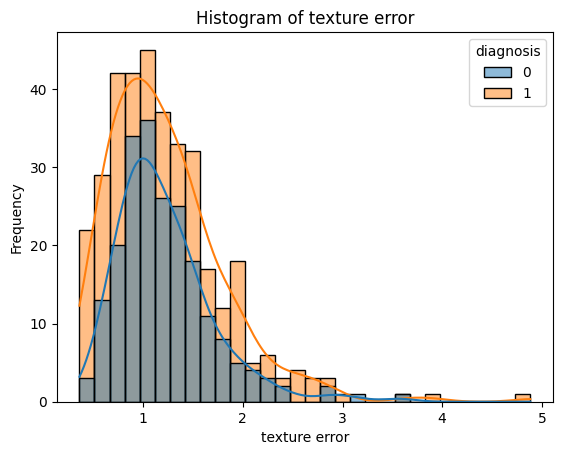

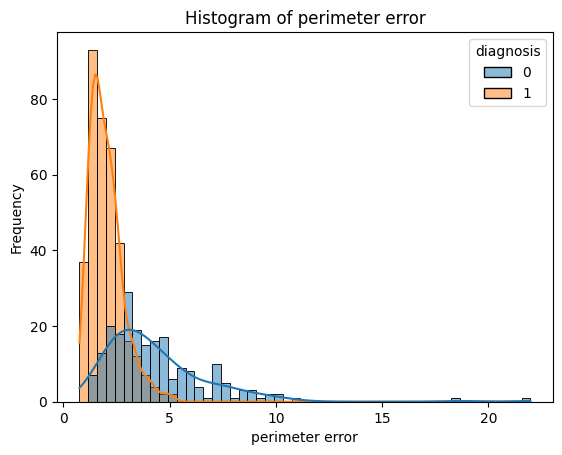

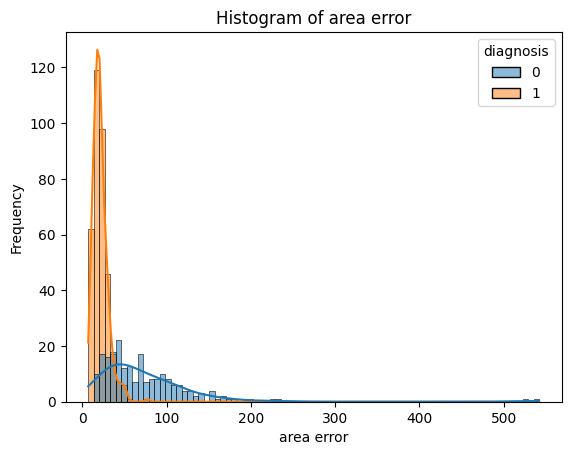

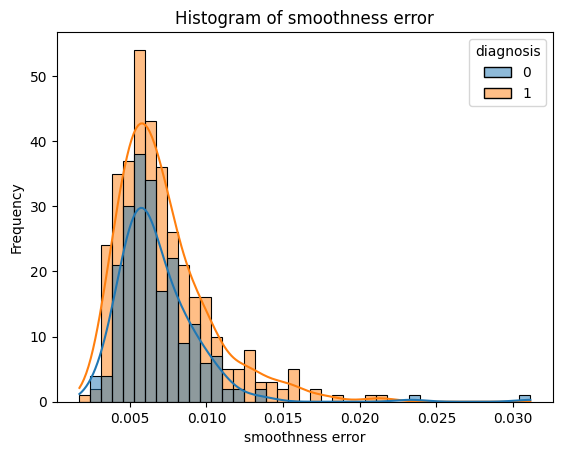

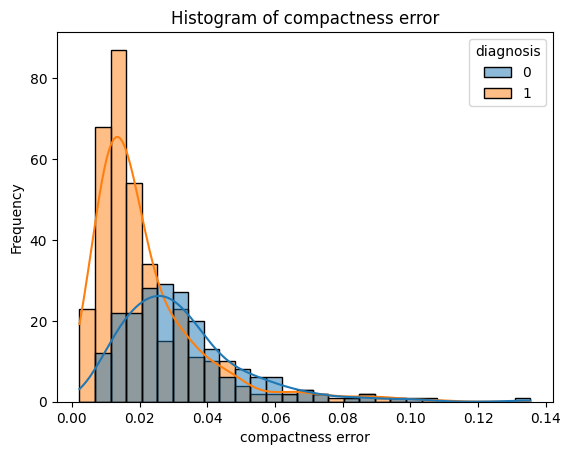

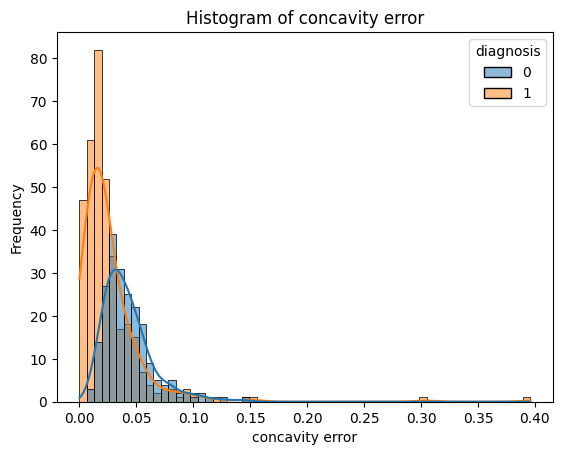

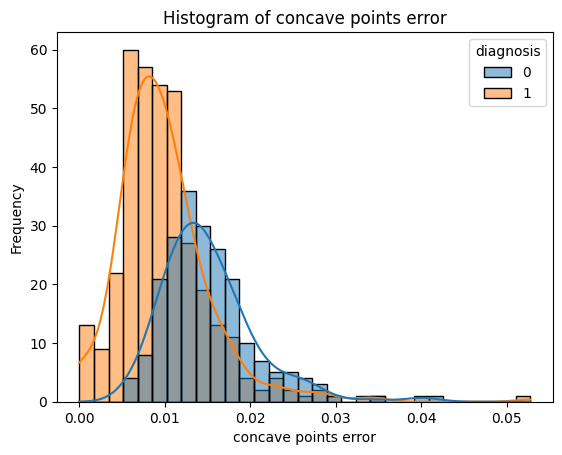

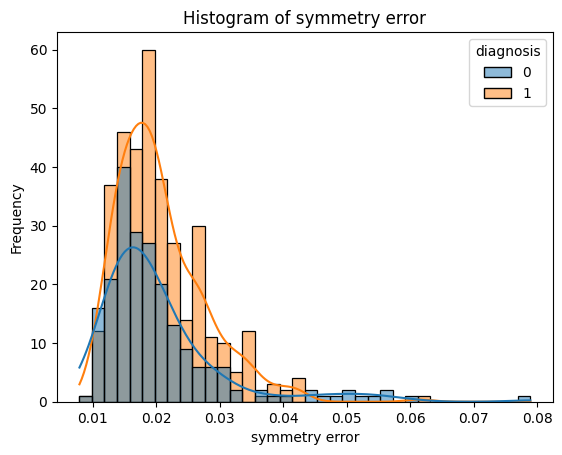

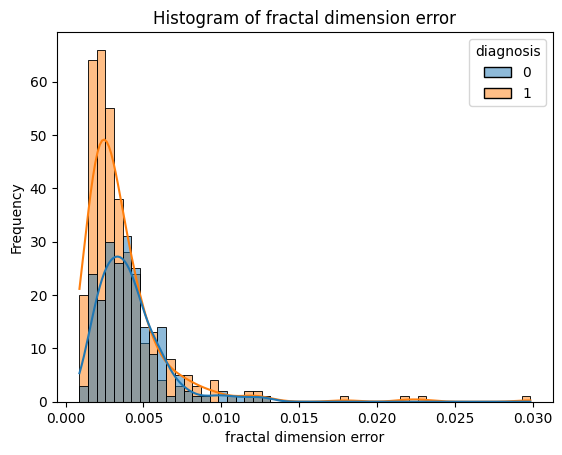

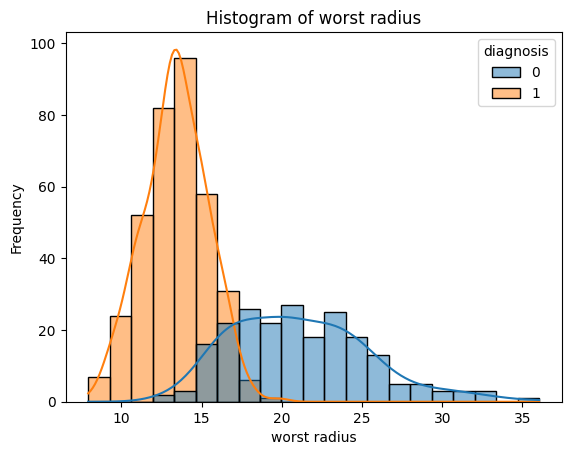

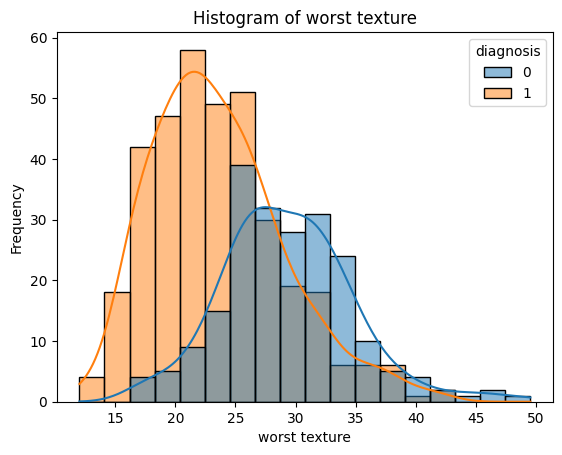

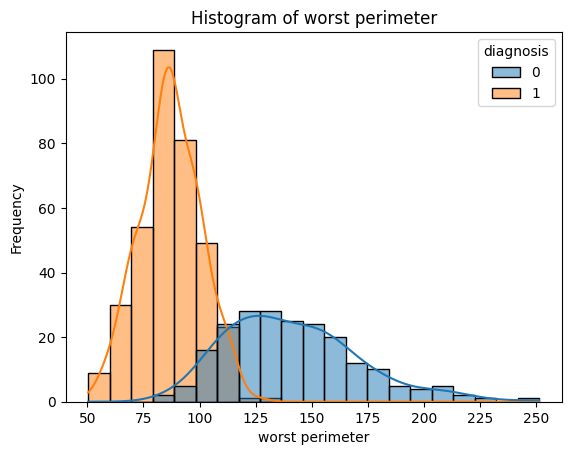

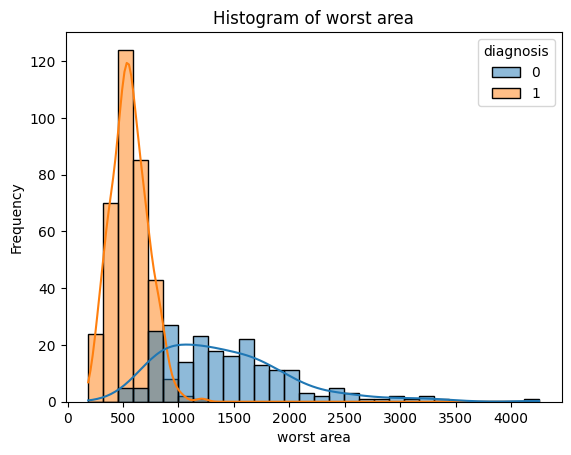

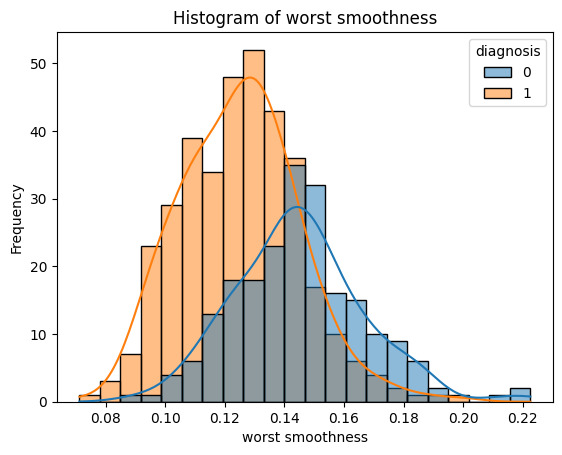

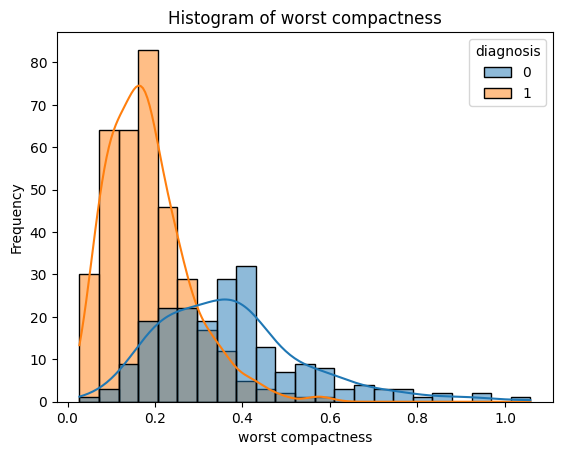

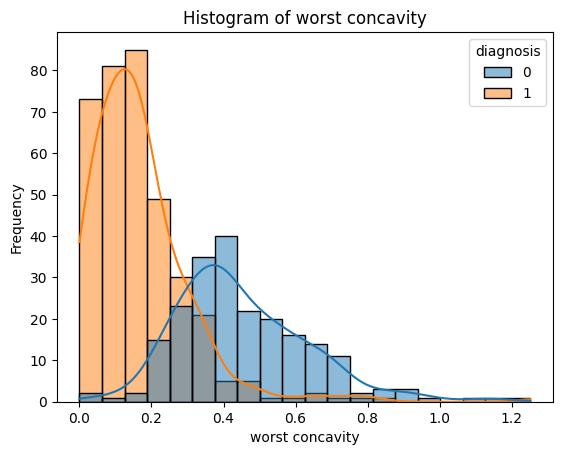

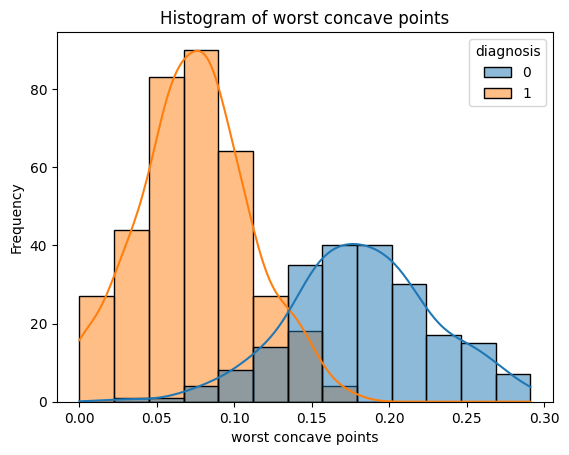

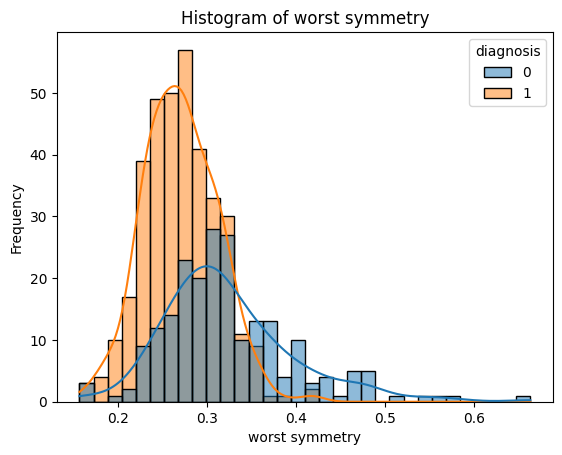

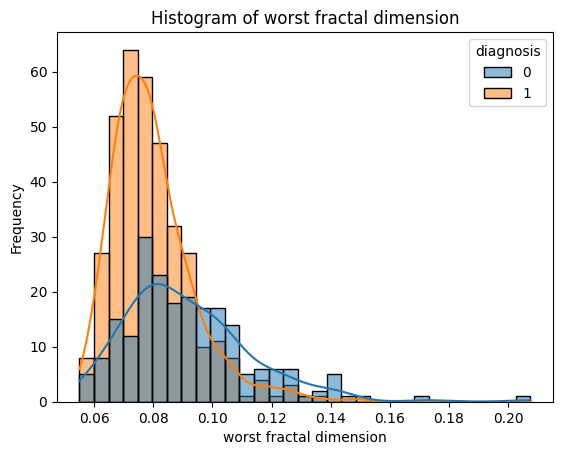

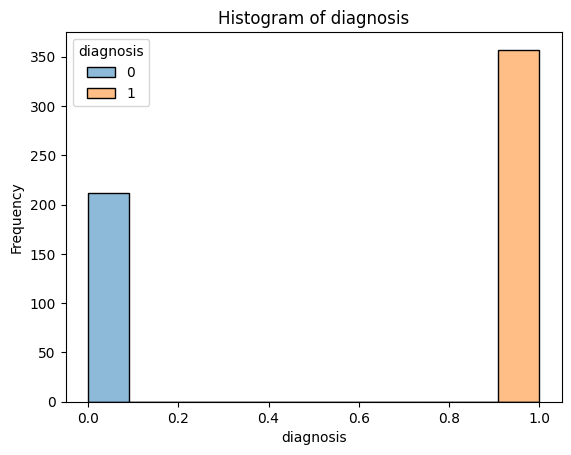

In [15]:
#plotting histplot for all the columns with relation to diagnosis to analyze data in more efficient manner
for i, column in enumerate(Cancer_dataframe.columns):
    sns.histplot(data=Cancer_dataframe, x=column,hue='diagnosis', kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [16]:
Cancer_dataframe.columns  #printing all columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [17]:
#splitting the data into features and target variable
X=Cancer_dataframe.drop(columns=['diagnosis'])
y=Cancer_dataframe['diagnosis']

In [18]:
#creating an object of StandardScaler
scaler = StandardScaler()

#Scaling the features
X = scaler.fit_transform(X)

In [19]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Initializing the logistic regression model with parameter max_iterations 3000
logistic_regression_model=LogisticRegression(max_iter=3000)

#training the logistic_regression_model
logistic_regression_model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [21]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction=logistic_regression_model.predict(X_test)
training_prediction=logistic_regression_model.predict(X_train)

Accuracy of logistic_regression_model on training and testing data

In [22]:
print("Accuracy score of our model on testing data: ",accuracy_score(y_test,testing_prediction))
print("Accuracy score of our model on training data: ",accuracy_score(y_train,training_prediction))

Accuracy score of our model on testing data:  0.9824561403508771
Accuracy score of our model on training data:  0.9874371859296482


In [23]:
#Classification report of our model
print(classification_report(y_test,testing_prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [24]:
# Initializing the guassian_naive_bias_model
guassian_naive_bias_model = GaussianNB()

#training the guassian_naive_bias_model
guassian_naive_bias_model.fit(X_train, y_train)

GaussianNB()

In [25]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction_new=guassian_naive_bias_model.predict(X_test)
training_prediction_new=guassian_naive_bias_model.predict(X_train)

Accuracy of guassian_naive_bias_model on training and testing data

In [26]:
print("Accuracy score of our model on testing data: ",accuracy_score(y_test,testing_prediction_new))
print("Accuracy score of our model on training data: ",accuracy_score(y_train,training_prediction_new))

Accuracy score of our model on testing data:  0.935672514619883
Accuracy score of our model on training data:  0.9422110552763819


In [27]:
#Classification report of our model
print(classification_report(y_test,testing_prediction_new))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

